<a href="https://colab.research.google.com/github/okanbuyuktepe/NLP-in-Tensorflow/blob/master/IMDB_reviews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import tensorflow as tf
print(tf.__version__)

2.2.0


In [8]:
info

tfds.core.DatasetInfo(
    name='imdb_reviews',
    version=1.0.0,
    description='Large Movie Review Dataset.
This is a dataset for binary sentiment classification containing substantially more data than previous benchmark datasets. We provide a set of 25,000 highly polar movie reviews for training, and 25,000 for testing. There is additional unlabeled data for use as well.',
    homepage='http://ai.stanford.edu/~amaas/data/sentiment/',
    features=FeaturesDict({
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=2),
        'text': Text(shape=(), dtype=tf.string),
    }),
    total_num_examples=100000,
    splits={
        'test': 25000,
        'train': 25000,
        'unsupervised': 50000,
    },
    supervised_keys=('text', 'label'),
    citation="""@InProceedings{maas-EtAl:2011:ACL-HLT2011,
      author    = {Maas, Andrew L.  and  Daly, Raymond E.  and  Pham, Peter T.  and  Huang, Dan  and  Ng, Andrew Y.  and  Potts, Christopher},
      title     = {Learning Word

In [9]:
import tensorflow_datasets as tfds
idmb, info = tfds.load("imdb_reviews/subwords8k", with_info=True, as_supervised = True)

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteR0OKAD/imdb_reviews-train.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteR0OKAD/imdb_reviews-test.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteR0OKAD/imdb_reviews-unsupervised.tfrecord


Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0. Subsequent calls will reuse this data.


In [0]:
train_data , test_data = idmb['train'], idmb['test']

In [0]:
# access the subword tokanizer
tokanizer = info.features['text'].encoder

In [12]:
print(tokanizer.subwords)

['the_', ', ', '. ', 'a_', 'and_', 'of_', 'to_', 's_', 'is_', 'br', 'in_', 'I_', 'that_', 'this_', 'it_', ' /><', ' />', 'was_', 'The_', 'as_', 't_', 'with_', 'for_', '.<', 'on_', 'but_', 'movie_', ' (', 'are_', 'his_', 'have_', 'film_', 'not_', 'ing_', 'be_', 'ed_', 'you_', ' "', 'it', 'd_', 'an_', 'he_', 'by_', 'at_', 'one_', 'who_', 'y_', 'from_', 'e_', 'or_', 'all_', 'like_', 'they_', '" ', 'so_', 'just_', 'has_', ') ', 'her_', 'about_', 'out_', 'This_', 'some_', 'ly_', 'movie', 'film', 'very_', 'more_', 'It_', 'would_', 'what_', 'when_', 'which_', 'good_', 'if_', 'up_', 'only_', 'even_', 'their_', 'had_', 'really_', 'my_', 'can_', 'no_', 'were_', 'see_', 'she_', '? ', 'than_', '! ', 'there_', 'get_', 'been_', 'into_', ' - ', 'will_', 'much_', 'story_', 'because_', 'ing', 'time_', 'n_', 'we_', 'ed', 'me_', ': ', 'most_', 'other_', 'don', 'do_', 'm_', 'es_', 'how_', 'also_', 'make_', 'its_', 'could_', 'first_', 'any_', "' ", 'people_', 'great_', 've_', 'ly', 'er_', 'made_', 'r_', 'B

In [13]:
sample_string = "Tensorflow, from basics to mastery"

tokanized_string = tokanizer.encode(sample_string)
print("Tokanized string is {}".format(tokanized_string))

original_string = tokanizer.decode(tokanized_string)
print("The original string: {}".format(original_string))

Tokanized string is [6307, 2327, 2934, 2, 48, 4249, 4429, 7, 2652, 8050]
The original string: Tensorflow, from basics to mastery


In [14]:
for ts in tokanized_string:
  print('{} ---> {}'.format(ts, tokanizer.decode([ts])))

6307 ---> Ten
2327 ---> sor
2934 ---> flow
2 ---> , 
48 ---> from 
4249 ---> basi
4429 ---> cs 
7 ---> to 
2652 ---> master
8050 ---> y


In [0]:
BUFFER_SIZE = 10000 
BATCH_SIZE = 64


train_dataset = train_data.shuffle(BUFFER_SIZE)
train_dataset = train_dataset.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(train_dataset))
test_dataset  = test_data.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(test_data))

In [16]:
embedding_dim = 64
model = tf.keras.Sequential([
                             tf.keras.layers.Embedding(tokanizer.vocab_size, embedding_dim),
                             tf.keras.layers.GlobalAveragePooling1D(),
                             tf.keras.layers.Dense(6, activation='relu'),
                             tf.keras.layers.Dense(1, activation= 'sigmoid')
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 64)          523840    
_________________________________________________________________
global_average_pooling1d (Gl (None, 64)                0         
_________________________________________________________________
dense (Dense)                (None, 6)                 390       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 7         
Total params: 524,237
Trainable params: 524,237
Non-trainable params: 0
_________________________________________________________________


In [17]:
num_epochs = 10
model.compile(loss= 'binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(train_dataset, epochs=num_epochs, validation_data=test_dataset)

Epoch 1/10
391/391 [==============================] - 16s 41ms/step - loss: 0.6720 - accuracy: 0.6236 - val_loss: 0.6178 - val_accuracy: 0.7603
Epoch 2/10
391/391 [==============================] - 16s 42ms/step - loss: 0.5106 - accuracy: 0.8092 - val_loss: 0.4448 - val_accuracy: 0.8337
Epoch 3/10
391/391 [==============================] - 16s 41ms/step - loss: 0.3647 - accuracy: 0.8724 - val_loss: 0.3825 - val_accuracy: 0.8382
Epoch 4/10
391/391 [==============================] - 16s 41ms/step - loss: 0.2983 - accuracy: 0.8944 - val_loss: 0.3277 - val_accuracy: 0.8738
Epoch 5/10
391/391 [==============================] - 16s 42ms/step - loss: 0.2594 - accuracy: 0.9089 - val_loss: 0.3132 - val_accuracy: 0.8791
Epoch 6/10
391/391 [==============================] - 17s 42ms/step - loss: 0.2346 - accuracy: 0.9180 - val_loss: 0.3138 - val_accuracy: 0.8774
Epoch 7/10
391/391 [==============================] - 16s 42ms/step - loss: 0.2140 - accuracy: 0.9259 - val_loss: 0.3077 - val_accuracy:

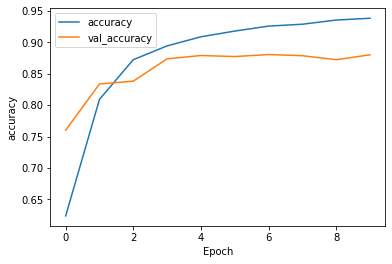

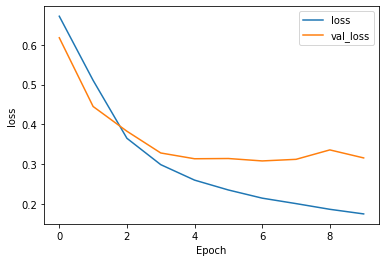

In [18]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel('Epoch')
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')

In [19]:
e = model.layers[0]
weights = e.get_weights()[0]
print(weights.shape) # shape = (vocab_size, embedding_dim)

import io
out_v = io.open('vecs.tsv', 'w', encoding='utf-8')
out_m = io.open('meta.tsv', 'w', encoding='utf-8')
for word_num in range(1, tokanizer.vocab_size):
  word = tokanizer.decode([word_num])
  embeddings = weights[word_num]
  out_m.write(word + "\n")
  out_v.write('\t'.join([str(x) for x in embeddings]) + "\n")
out_v.close()
out_m.close()

(8185, 64)


In [0]:
try:
  from google.colab import files
except ImportError:
  pass
else:
  files.download('vecs.tsv')
  files.download('meta.tsv')